In [1]:
# imports
import market_status as ms
from IPython.display import display_html
import pandas as pd
import datetime as dt
import os

***
# **Market Status Notebook**
This notebook aims to provide comprehensive status of the market, which direction its heading and which sector is stronger than the other. All required code is written in python script ```market_status.py``` to save space. All days used in this notebook are meant as **trading** days.

**Stuff to implement**
- Options status for major indices
- Distribution days for indices (based on the "How to Make Money in Stocks" book)
- ~~Add Nasdaq to indices overview (remove double stochastic, keep only VFI)~~
- Recent IPOs (use finviz screener) with basic stats (IPO date, industry)
- Crypto status (only the big ones compared to USD = BTC, ETH, další?)
- Add small cheatsheet what to look for with each notebook section

**Basic information** 
<br>
Market is open every weekday from 09:30 to 16:00 EST (15:30 to 22:00 CET)
<br>
Holidays (when market is closed)
<table>
<thead>
<tr>
<th>Date</th>
<th>Weekday</th>
<th>Note</th>
</tr>
</thead>
<tbody>
<tr>
<td>30/05/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>20/06/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>04/07/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>05/09/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>24/11/2022</td>
<td>Thursday</td>
<td>Closes at 13:00</td>
</tr>
<tr>
<td>26/12/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
</tbody>
</table>


## **World Markets**

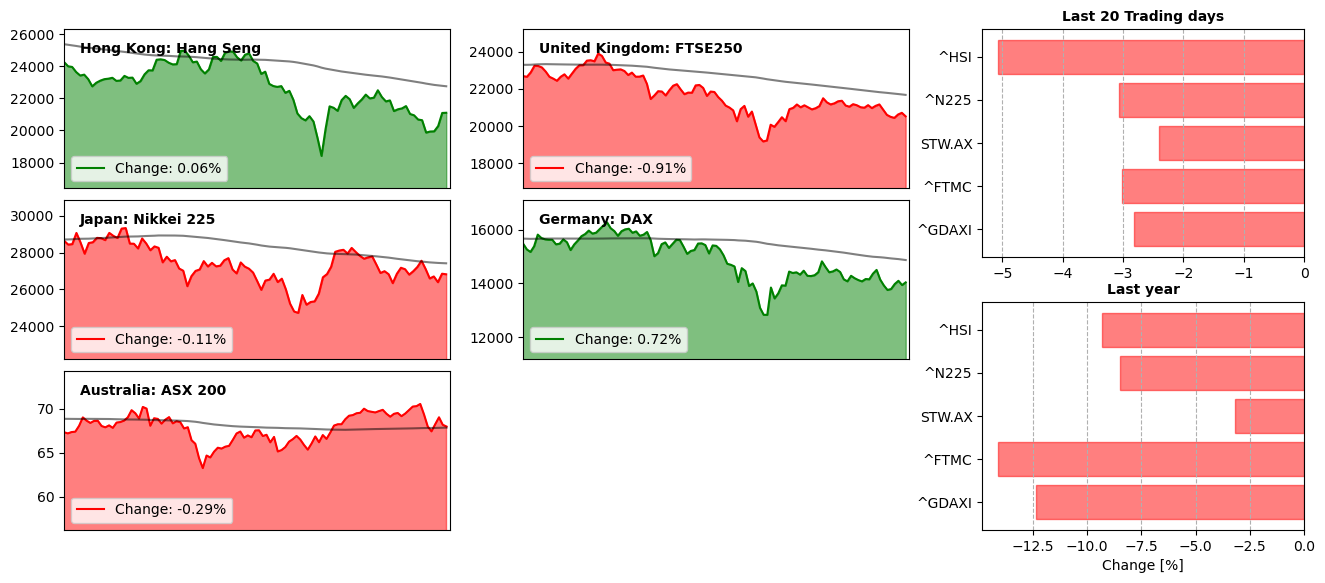

In [2]:
ms.worldmarkets()

***
## **US markets**
Spy = ETF following S&P500, IWM = ETF following Russell 2000
<br>
Follow the price action. How is the price and volume evolving? Any clear support or resistance soon? How is the new highs/new lows indicator acting compared to the overall market?

Last update done: 04-05-2022 at 09:01:19


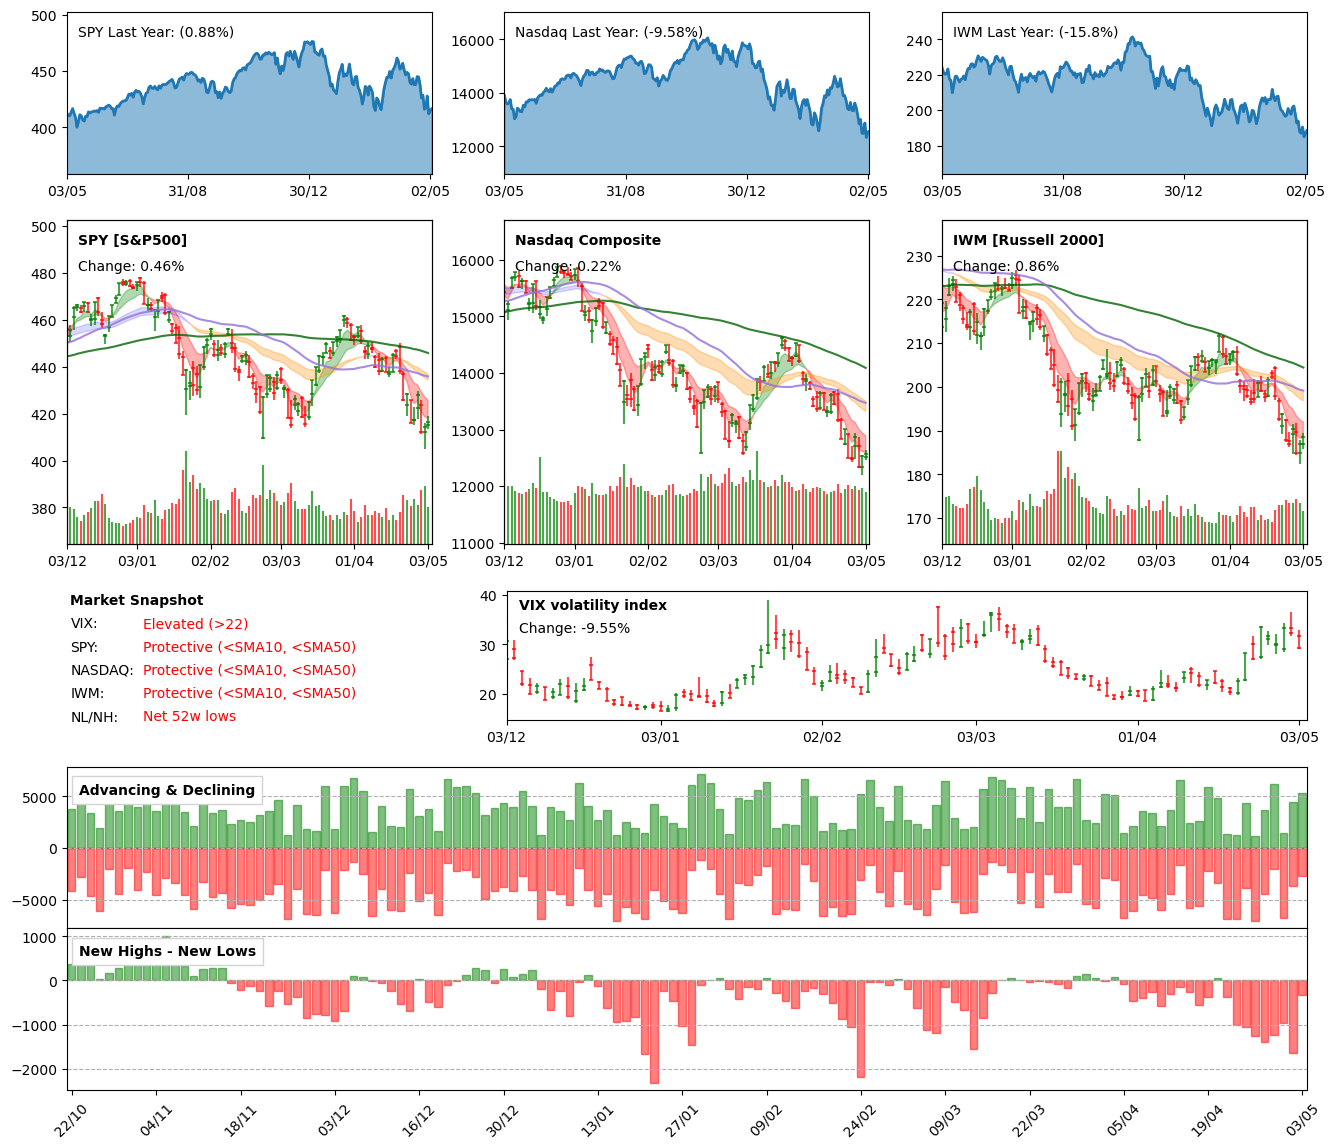

In [3]:
ms.usmarkets()

***
## **Sectors**
Explanations:
- Consumer Discretionary (cyclical) = goods and services that are considered non-essential by consumers, but desirable
- Consumer Staples (non-cyclical, defensive) = set of essential products used by consumers. This category includes things like foods and beverages, household goods, and hygiene products as well as alcohol and tobacco. 

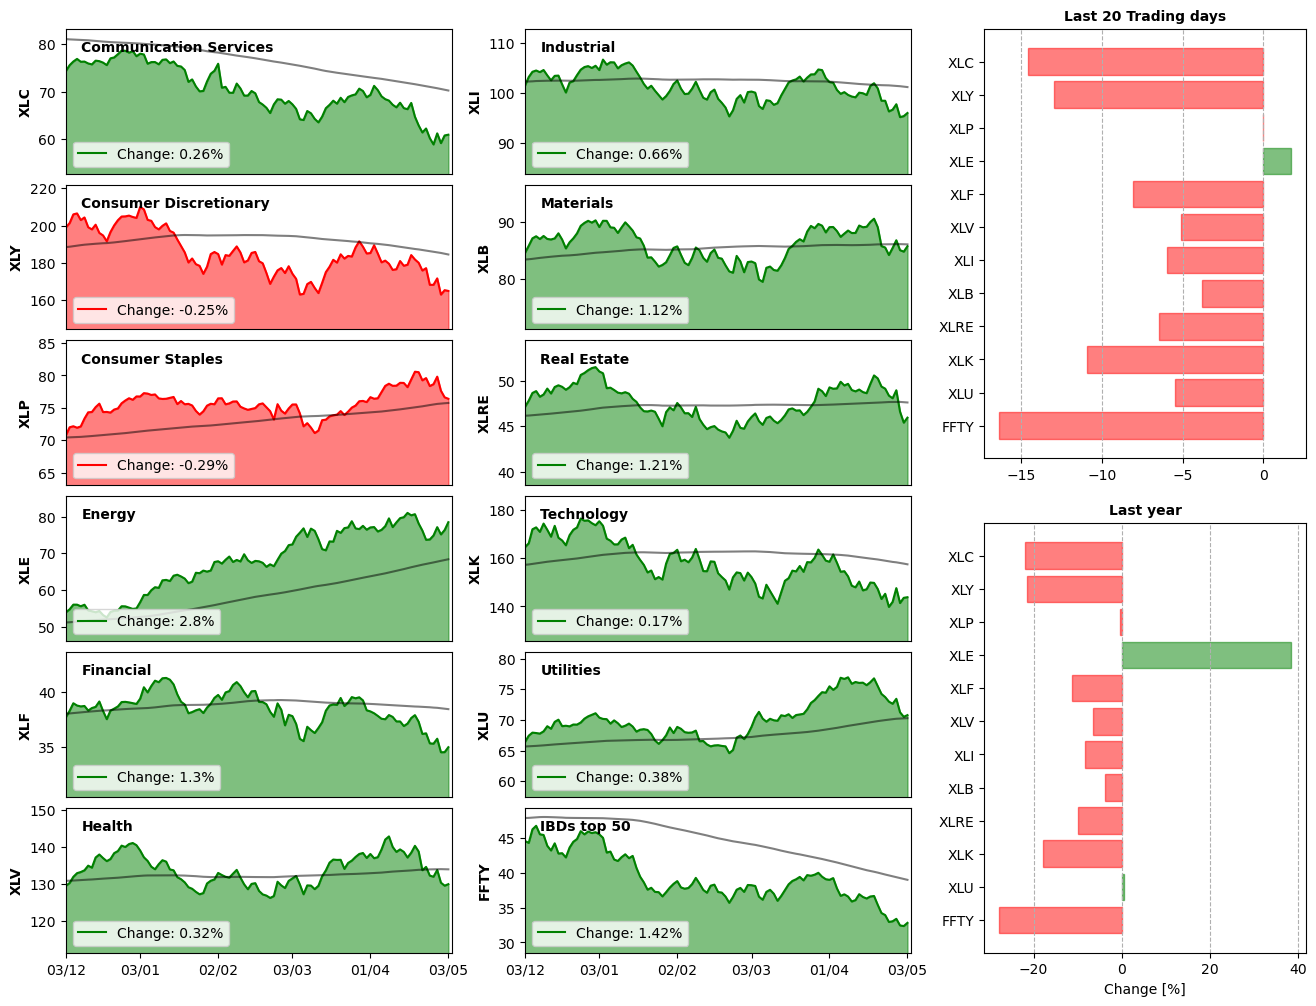

In [4]:
ms.sectors()

### Industries
Following tables are 20 best performing industries in last month followed by 10 worst performing indistries. Both tables are sorted by descending performance over last month.
<br>
Any industry shows relative strength compared to rest of the market? This could be potential winner for next cycle.

In [5]:
ind = ms.industries(sf=True, rank=True)
display_html(ind.prettify(ind.table.iloc[:20,:])._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Position
Lumber & Wood Production,4.95,10.11,15.06,16.48,0.71,2.41,1
Utilities - Independent Power Producers,6.36,8.93,4.40,32.71,0.95,3.18,-1
Thermal Coal,2.38,6.83,68.77,256.77,0.81,3.93,0
Auto & Truck Dealerships,8.99,6.78,-17.13,-19.54,0.79,3.23,0
Oil & Gas Refining & Marketing,9.19,6.65,26.24,26.64,0.99,3.15,0
Coking Coal,10.81,4.89,60.64,199.11,0.80,6.33,13
"Furnishings, Fixtures & Appliances",4.69,3.62,-27.45,-35.77,0.93,2.78,5
Food Distribution,-1.43,3.41,9.41,3.43,0.82,0.94,0
Apparel Retail,1.13,2.62,-18.51,-19.40,0.75,-0.70,-3
Electronics & Computer Distribution,7.71,2.49,3.25,4.07,1.67,0.70,6


In [6]:
display_html(ind.prettify(ind.table.iloc[-10:,:])._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Position
Electronic Gaming & Multimedia,2.25,-14.83,-51.34,-44.90,0.74,0.25,3
Medical Instruments & Supplies,-2.73,-15.04,-21.47,-14.27,0.85,0.18,-5
Other Industrial Metals & Mining,5.46,-15.56,20.09,-10.20,0.68,0.93,-7
Solar,10.62,-16.68,-38.33,-7.20,1.04,4.27,3
Software - Application,0.76,-16.70,-42.88,-29.09,0.81,-1.09,0
Health Information Services,-4.03,-16.94,-40.03,-40.82,1.38,-1.80,-13
Copper,0.53,-19.93,6.98,-1.71,0.88,0.66,-1
Internet Retail,-5.28,-20.75,-32.37,-36.60,0.78,-0.40,0
Entertainment,-4.87,-22.04,-39.30,-37.94,0.96,-0.35,0
Aluminum,0.00,-25.43,-0.84,5.03,0.93,-0.87,0


In [7]:
display_html(ind.prettify2(ind.volumechange())._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Volprice product
Paper & Paper Products,2.20,-6.31,12.95,-15.14,4.16,1.72,7.155200
REIT - Healthcare Facilities,-1.69,-8.00,-1.87,-0.34,2.29,2.78,6.366200
Oil & Gas Drilling,8.76,0.65,47.10,86.48,0.91,6.97,6.342700
REIT - Mortgage,4.35,-5.19,-17.42,-16.97,1.45,4.03,5.843500
Recreational Vehicles,6.76,-1.27,-23.02,-35.11,1.19,4.41,5.247900
Coking Coal,10.81,4.89,60.64,199.11,0.80,6.33,5.064000
Solar,10.62,-16.68,-38.33,-7.20,1.04,4.27,4.440800
Agricultural Inputs,4.10,-0.51,40.85,44.13,1.19,3.55,4.224500
Oil & Gas E&P,7.43,0.32,37.13,88.93,0.75,4.61,3.457500
Marine Shipping,10.26,-8.47,15.48,27.08,0.67,4.88,3.269600


***
## **Futures**
Selected commodities futures. 
Will add also column for a relative year performance, but currently scrapper has a problem that the ethanol returns Null value.

In [8]:
futures = ms.futures()
data_futures = futures.returnfutures()
display_html(futures.prettify(data_futures.iloc[:12,:])._repr_html_()+"\xa0\xa0\xa0"+futures.prettify(data_futures.iloc[12:,:])._repr_html_(), raw=True)

AttributeError: 'NoneType' object has no attribute 'split'

***
## **Crypto & Forex**

In [ ]:
# outptut table with cryptos and their preformance in last day/week/month

***
## **New IPOs**
New companies on the market during the last month, look for interesting price changes or so

---
**Run check:** Checks if the code run well <br>
**Saving:** Following code is for saving the notebook into the HTML file for easy reading and sharing. Need to be done manually, when notebook finishes running!


In [ ]:
# run check

In [ ]:
# save
os.system("jupyter nbconvert --to html --template classic market_status.ipynb")

0